In [1]:
from  load_data import *
from process_ir_data import *

### Load Raw Data

In [2]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
#Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [3]:
# Instantiate class - doesn't work as Peaks(ir_data), I have to use Peaks = Peaks(ir_data), why?
Peaks = Peaks(ir_data)

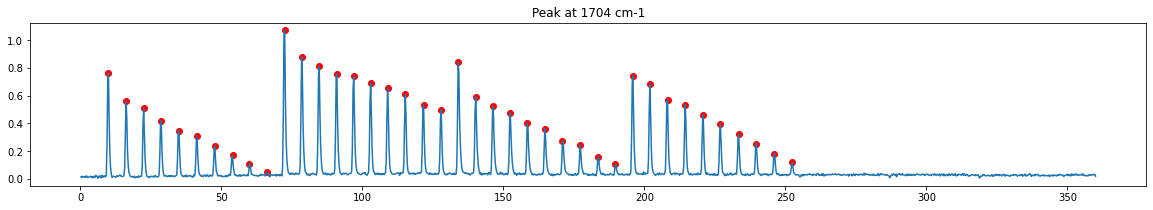

In [4]:
# Determine the peak prominences of every wavelength
#processed_ir_data = Peaks.prominence_all(0.032)

# Determine the peak prominences of a single wavelength
#processed_ir_data = Peaks.prominence(0.032,'Peak at 1704 cm-1')

# Determine the peak heights of a single wavelength - TO TEST
processed_ir_data = Peaks.height(0.0505,'Peak at 1704 cm-1')

# Determine the experimental areas of each peak - must be only one wavelength
#processed_ir_data = Peaks.exp_area(0.032, 4, 'Peak at 1704 cm-1')

# Determine the experimental areas of each peak - must be only one wavelength
#processed_ir_data = Peaks.fitted_area(0.032, 4, 'Peak at 1704 cm-1')

# Fit a gaussian to a single peak and determine it's area - must be only one wavelength
#processed_ir_data= Peaks.fitted_area_sp(0.05, 4, 'Peak at 1704 cm-1', 0)

# Visualise which peaks have been picked - single peak
Peaks.plot(processed_ir_data, 'Peak at 1704 cm-1')

#processed_ir_data

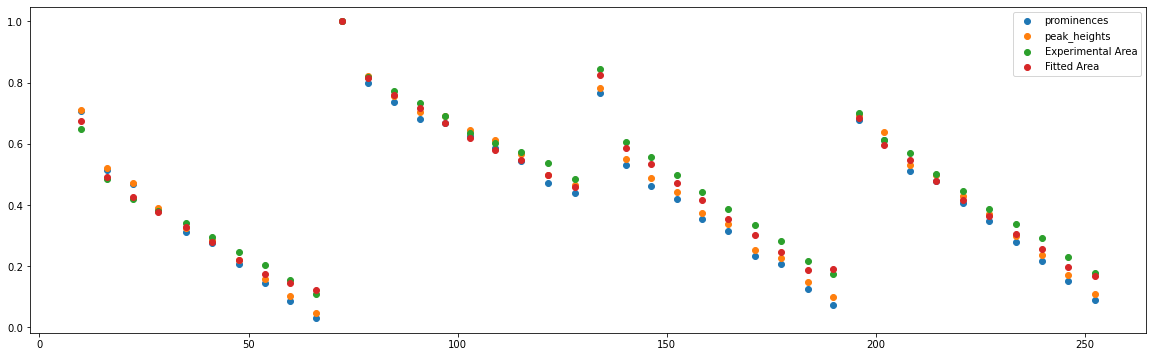

In [5]:
# Add this as def compare

# Run each function. Use the relative time 
prominence = Peaks.prominence(0.032,'Peak at 1704 cm-1')
height = Peaks.height(0.0505,'Peak at 1704 cm-1').iloc[:,1]
exp_area = Peaks.exp_area(0.032, 4, 'Peak at 1704 cm-1').iloc[:,1]
fitted_area = Peaks.fitted_area(0.032, 4, 'Peak at 1704 cm-1').iloc[:,1]
tmp = [prominence,height,exp_area,fitted_area]
compare = pd.concat(tmp, axis=1)

df =[]
for var in range(1,len(compare.columns)):
    tmp = compare.iloc[:,var]/max(compare.iloc[:,var])
    df.append(tmp)
thing = pd.concat(df, axis=1)

# Plot all picked peaks
fig = plt.figure(figsize=(20,6))
for var in range(0,4):
    plt.scatter(compare['Relative Time'], thing.iloc[:,var], label = thing.columns[var])
    plt.legend()

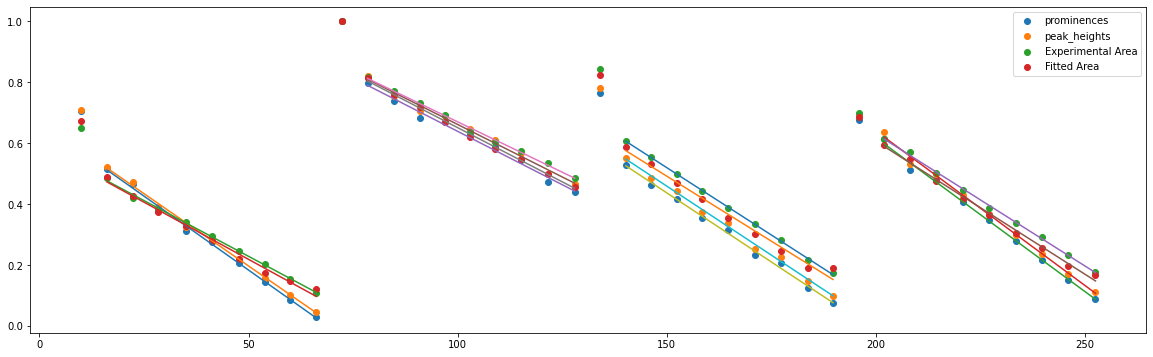

In [79]:


fig = plt.figure(figsize=(20,6))
for var in range(0,4):
    plt.scatter(compare['Relative Time'], thing.iloc[:,var], label = thing.columns[var])
    plt.legend()

no_reactions = 4 # Define in function
points_per_reaction = 10 # Define in function

# Create best fit line through each experiment (minus t0)
for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
    a, b = np.polyfit(compare.iloc[1+var:10+var,0],thing.iloc[1+var:10+var,:], 1)
    
    # Plot lines
    for var2 in range(0, no_reactions):
        plt.plot(compare.iloc[1+var:10+var,0], a[var2] * compare.iloc[1+var:10+var,0] + b[var2])

In [135]:
df3 = []
# For loop along each reaction
for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
    df = []
    
    # For loop along along each peak property
    for var2 in range(0,len(thing.columns)):
        r2 = np.corrcoef(compare.iloc[1+var:10+var,0],thing.iloc[1+var:10+var,var2])[0,1]
        df.append(r2)
        df2 = pd.DataFrame(df)
    df3.append(df2)

# Must transpose df to be the same orientation as previous dfs
final = pd.concat(df3, axis=1)#.T.reset_index(drop=True)
#final.columns = list(thing.columns)
final

,0,0,0,0
0,-0.998233,-0.994728,-0.997984,-0.998309
1,-0.998419,-0.994768,-0.997953,-0.997940
2,-0.999064,-0.997964,-0.999745,-0.999282
3,-0.994618,-0.998519,-0.993446,-0.997623
